# 6. Дуботолкова 3530903/70301

#### 1.1 Начальная популяция - Случайная генерация
#### 2.1 Отбор - выбор каждой особи пропорционально приспособленности (рулетка)
#### 3.1 Скрещивание - многоточечный с 3мя точками
#### 4.3 Мутация - добавление 1 случайной вещи 5% особей
#### 5.1 Новая популяция -  замена 20% худших особей из предыдущего поколения на лучших потомков

In [1]:
#libraries
import random
from random import randint

In [2]:
f = open('6.txt')
line = f.readline()
f.close()
lst = line.split(" ")
myWeight = int(lst[0])
myVolume = int(lst[1])
print(myWeight)
print(myVolume)
data = []

f = open('6.txt')
for line in f.readlines():
    t = tuple(float(item) for item in line.split(' '))
    data.append(t)
f.close()
del data[0]

weightList = list(list(zip(*data))[0])
volumeList = list(list(zip(*data))[1])
priceList = list(list(zip(*data))[2])

print(weightList)
print(volumeList)
print(priceList)

13000
12
[339.0, 621.0, 1159.0, 595.0, 1356.0, 612.0, 107.0, 1359.0, 1181.0, 1262.0, 1152.0, 1296.0, 1149.0, 1140.0, 1188.0, 1014.0, 538.0, 831.0, 1568.0, 1218.0, 1306.0, 441.0, 1084.0, 1077.0, 1436.0, 384.0, 1271.0, 798.0, 921.0, 268.0]
[0.8, 0.9, 0.6, 1.0, 0.9, 0.4, 1.1, 0.5, 0.5, 0.7, 1.0, 1.0, 0.7, 1.1, 0.5, 1.1, 1.0, 1.1, 0.9, 1.0, 0.5, 0.5, 1.2, 1.0, 0.8, 0.9, 0.7, 0.6, 1.0, 1.1]
[211.0, 125.0, 237.0, 292.0, 167.0, 273.0, 386.0, 167.0, 266.0, 331.0, 385.0, 196.0, 290.0, 232.0, 137.0, 155.0, 220.0, 106.0, 327.0, 295.0, 330.0, 319.0, 292.0, 331.0, 362.0, 140.0, 328.0, 288.0, 348.0, 123.0]


In [3]:
populationSize = 200
countElements = len(weightList) #30
maxGenerations = 500
percentForMutation = 0.05

In [4]:
def validWeight(individual):
    weight=0.0
    weight = sum([a*b for a,b in zip(weightList,individual)])
    if weight > myWeight:
        return 0
    else:
        return 1
        
def validVolume(individual):   
    volume=0.0
    volume = sum([a*b for a,b in zip(volumeList,individual)])
    if volume > myVolume:
        return 0
    else:
        return 1
    
def valuation(individual):
    return(sum([a*b for a,b in zip(priceList, individual)]))


In [5]:
#Начальная популяция - Случайная генерация

#генерация "валидной" особи
def createIndividual():
    individual = [randint(0, 1) for x in range(countElements)]
    while not ((validWeight(individual)) and (validVolume(individual))):
        individual = [randint(0, 1) for x in range(countElements)]
    return individual

#генерация популяции из 200 особей
def createPopulation():
    return [createIndividual() for _ in range(populationSize)]

In [6]:

def fitness(individual):
    weight, volume, price = 0.0, 0.0, 0.0
    weight = sum([a*b for a,b in zip(weightList,individual)])
    volume = sum([a*b for a,b in zip(volumeList,individual)])
    price = sum([a*b for a,b in zip(priceList, individual)])
    if weight > myWeight or volume > myVolume:
        price = 0
    return price
ind = createIndividual()
print(fitness(ind))

print(ind)

3331.0
[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]


In [7]:
# Отбор - выбор каждой особи пропорционально приспособленности (рулетка)

#список ценностей всех особей в популяции
def GetFitnessList(population):
    return [valuation(population[i]) for i in range(len(population))]

#сумма всех фитнесс-функций
def SumFitnesses(fitnesses):
    return (sum(fitnesses[i] for i in range(len(fitnesses))))

Для вычисления колеса, воспользуюсь формулой 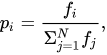, где  fi фитнес функция особи i в популяции, N - число собей в популяции

In [8]:
# Выбор колеса рулетки.
def roulette_select(population):
    result_population = []
    population_for_roulette = population
    for item in population_for_roulette:
        item.append(valuation(item))
    population_for_roulette.sort(key=lambda x: x[countElements], reverse=False) #Сортируем по возрастанию ценности
    for item in population_for_roulette:
        item.pop()

    while(len(population_for_roulette) > 0):
        fitness_sum = SumFitnesses(GetFitnessList(population_for_roulette))
        previous_probability = 0

        for ind in population_for_roulette:
            if fitness_sum == 0:
                probability = previous_probability
            else:
                probability = previous_probability + (valuation(ind) / fitness_sum)
            ind.append(probability)
            previous_probability = probability
        r = random.random()
        selected_ind = population_for_roulette[0]  # initialize
        for ind in population_for_roulette:
            if ind[countElements] > r:
                break;
        ind.pop(countElements)
        selected_ind = ind
        population_for_roulette.remove(ind)
        result_population.append(selected_ind)

        for i in range(len(population_for_roulette)):
            population_for_roulette[i].pop(countElements)

    return result_population

In [9]:
# Скрещивание - многоточечный с 3мя точками
def GetTwoChildren(first_parent, second_parent):
    point1 = random.randint(0, countElements/3)
    point2 = random.randint(point1, countElements/3 * 2)
    point3 = random.randint(point2, countElements)

    child1 = first_parent[0:point1] + second_parent[point1:point2] + first_parent[point2:point3] + second_parent[point3:]
    child2 = second_parent[0:point1] + first_parent[point1:point2] + second_parent[point2:point3] + first_parent[point3:]

    return child1, child2

In [10]:
# Скрещивание
def Crossingover(individuals):
    individuals = roulette_select(individuals)
    new_population = []
    count = len(individuals) - 1
    while count > 0:
        first_parent = individuals[0]
        individuals.pop(0)
        count -= 1
        second_parent = individuals[0]
        individuals.pop(0)
        count -= 1
        first_child, second_child = GetTwoChildren(first_parent, second_parent)

    return new_population

In [11]:
# Мутация - добавление 1 случайной вещи 5% особей
def mutation(individual):
    flag = 1
    while flag:
        i = randint(0, len(individual)-1)
        if individual[i] == 0:
            individual[i] = 1
        flag = 0
    return individual

In [12]:
def checkWeightVolume(population):
    weight = 0
    size = 0
    weight = sum([a*b for a,b in zip(weightList,population[i])])
    volume = sum([a*b for a,b in zip(volumeList,population[i])])
    if (weight > myWeight or volume > myVolume):
        return 0
    else: return 1

In [13]:
def Sort(population):
    population.sort(key=lambda x: x[countElements], reverse=True)

In [14]:
# Отбор: 20% самых приспособленных особей

def selectionGood(population):
    population.sort(key=lambda x: valuation(x), reverse=True)
    newPopulation = []
    for i in range (0, round(len(population) * 0.2)):
            newPopulation.append(population[i])
    return newPopulation

In [15]:
# Отбор: 20% самых НЕприспособленных особей

def selectionBad(population):
    population.sort(key=lambda x: valuation(x), reverse=False)
    newPopulation = []
    for i in range (0, round(len(population) * 0.2)):
            newPopulation.append(population[i])
            del(population[i])
    return newPopulation

In [16]:
# отбрасываем всех кто не проходит по весу и объему
def Filter(population):
    filtered_population = list(filter(lambda x: checkWeightVolume(x), population))
    return filtered_population

In [17]:
# Вывод разультата
selectedItems = []
def printRes(individual):
    selectedItems = []
    weight, volume, price = 0.0, 0.0, 0.0
    for i in range(0, len(individual)):
        weight = sum([a*b for a,b in zip(weightList,individual)])
        volume = sum([a*b for a,b in zip(volumeList,individual)])
        price = sum([a*b for a,b in zip(priceList, individual)])
        selectedItems.append(data[i])
    print("Вес = ", weight, "Объем = ", volume, "Ценность = ", price)
    print("Выбранные элементы = ", selectedItems)
    
  

In [18]:
# Вывод разультата в файл
selectedItems = []
def printResToFile(individual):
    selectedItems = []
    weight, volume, price = 0.0, 0.0, 0.0
    for i in range(0, len(individual)):
        weight = sum([a*b for a,b in zip(weightList,individual)])
        volume = sum([a*b for a,b in zip(volumeList,individual)])
        price = sum([a*b for a,b in zip(priceList, individual)])
        selectedItems.append(data[i])
    print("Вес = ", weight, "Объем = ", volume, "Ценность = ", price)
    print("Выбранные элементы = ", selectedItems)  
    my_file=open('ga_4_2.txt','w')
    my_file.write(f'Полученный набор: {individual}' + '\n'+ 
                  f'Полученный вес: {weight}' + '\n'+
                  f'Полученный объем: {volume,}'+ '\n'+
                  f'Полученная цена: {price}')
    my_file.close()

In [19]:
def GA(initialPopulation, min_cost):
    population = initialPopulation
    best_values = []
    print(len(initialPopulation))
    for index in range(0, maxGenerations):
        print("Поколение ", index)

        newPopulation = Crossingover(population)

        for i in range(0, round(len(newPopulation) * percentForMutation)):
            individualForMutationNumber = random.randint(0, len(newPopulation) - 1)
            newPopulation[individualForMutationNumber] = mutation(newPopulation[individualForMutationNumber])
        
       
        #находим 20% плохих особей в старой популяции
        selectionBad(population)
        #находим 20% хороших особей в новой популяции
        goodPopulation = selectionGood(newPopulation)
        
        #добавляем 20% хороших особей в новую популяцию
        population = population + goodPopulation
        
        #отбрасываем те особи, кто не подходит под наши требования
        population = Filter(population)
        
        #если в результате мутации появились нежизнеспособные особи, то добавим новых, до постоянного числа
        while len(population) < populationSize:
            population.append(createIndividual())
        for item in population:
            item.append(valuation(item))
            
        Sort(population)
        
        for item in population:
            item.pop()

        best_value = valuation(population[0])
        best_values.append(best_value)

        print("bestValue ", best_value)
        print("bestValues ", best_values)
        print("bestIndividual", population[0])
        printRes(population[0])

        print("\n")
        if index > 1 and abs(min(best_values) - max(best_values)) <= min_cost:
            break
    

    return population[0]

In [21]:
cheapestValue = priceList[0]

# стоимость самой дешевой вещи
for i in range(len(data)):
    if (priceList[i] < cheapestValue):
        cheapestValue = priceList[i]
print("cheapestValue = ", cheapestValue)


initialPopulation = createPopulation()
best = GA(initialPopulation, cheapestValue)
print("Результат:")
printRes(best)

cheapestValue =  106.0
200
Поколение  0
bestValue  3925.0
bestIndividual [1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0]
Вес =  12280.0 Объем =  11.899999999999999 Ценность =  3925.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  1
bestValue  3756.0
bestIndividual [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

bestValue  4059.0
bestIndividual [0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0]
Вес =  11784.0 Объем =  11.399999999999999 Ценность =  4059.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  12
bestValue  3942.0
bestIndividual [0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0]
Вес

bestValue  4057.0
bestIndividual [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0]
Вес =  12135.0 Объем =  11.4 Ценность =  4057.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  22
bestValue  3896.0
bestIndividual [1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0]
Вес =  12551.0 Об

bestValue  3939.0
bestIndividual [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
Вес =  11673.0 Объем =  11.599999999999998 Ценность =  3939.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  32
bestValue  3859.0
bestIndividual [1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0]
Вес

bestValue  4157.0
bestIndividual [1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1]
Вес =  12173.0 Объем =  11.899999999999999 Ценность =  4157.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  42
bestValue  3829.0
bestIndividual [0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1]
Вес

bestValue  3948.0
bestIndividual [0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1]
Вес =  11804.0 Объем =  11.0 Ценность =  3948.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  53
bestValue  3803.0
bestIndividual [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
Вес =  12513.0 Об

bestValue  3975.0
bestIndividual [0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0]
Вес =  12400.0 Объем =  11.2 Ценность =  3975.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  63
bestValue  3966.0
bestIndividual [1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1]
Вес =  12324.0 Об

bestValue  4071.0
bestIndividual [1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]
Вес =  12901.0 Объем =  11.300000000000002 Ценность =  4071.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  73
bestValue  3832.0
bestIndividual [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0]
Вес

bestValue  4026.0
bestIndividual [1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0]
Вес =  11939.0 Объем =  10.500000000000002 Ценность =  4026.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  83
bestValue  3995.0
bestIndividual [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0]
Вес

bestValue  4113.0
bestIndividual [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1]
Вес =  11935.0 Объем =  11.600000000000001 Ценность =  4113.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  94
bestValue  3899.0
bestIndividual [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0]
Вес

bestValue  3979.0
bestIndividual [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0]
Вес =  12912.0 Объем =  11.2 Ценность =  3979.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  104
bestValue  4090.0
bestIndividual [0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]
Вес =  12666.0 О

bestValue  4013.0
bestIndividual [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1]
Вес =  12094.0 Объем =  11.599999999999998 Ценность =  4013.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  114
bestValue  3762.0
bestIndividual [1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0]
Ве

bestValue  4232.0
bestIndividual [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0]
Вес =  12551.0 Объем =  11.0 Ценность =  4232.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  124
bestValue  4038.0
bestIndividual [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]
Вес =  12051.0 О

bestValue  4137.0
bestIndividual [1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0]
Вес =  12822.0 Объем =  11.9 Ценность =  4137.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  134
bestValue  3962.0
bestIndividual [1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0]
Вес =  11632.0 О

bestValue  3922.0
bestIndividual [1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0]
Вес =  12859.0 Объем =  10.899999999999999 Ценность =  3922.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  144
bestValue  4050.0
bestIndividual [1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0]
Ве

bestValue  4072.0
bestIndividual [1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0]
Вес =  12533.0 Объем =  11.9 Ценность =  4072.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  154
bestValue  4172.0
bestIndividual [1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
Вес =  12724.0 О

bestValue  3959.0
bestIndividual [0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0]
Вес =  11764.0 Объем =  11.700000000000001 Ценность =  3959.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  164
bestValue  4102.0
bestIndividual [1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]
Ве

bestValue  4021.0
bestIndividual [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1]
Вес =  12268.0 Объем =  11.700000000000001 Ценность =  4021.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  174
bestValue  4151.0
bestIndividual [0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1]
Ве

bestValue  3946.0
bestIndividual [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0]
Вес =  12763.0 Объем =  10.9 Ценность =  3946.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  184
bestValue  3809.0
bestIndividual [0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0]
Вес =  12139.0 О

bestValue  4138.0
bestIndividual [1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0]
Вес =  12853.0 Объем =  11.7 Ценность =  4138.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  194
bestValue  3887.0
bestIndividual [1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]
Вес =  11269.0 О

bestValue  3844.0
bestIndividual [0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0]
Вес =  12872.0 Объем =  11.899999999999999 Ценность =  3844.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  204
bestValue  4062.0
bestIndividual [0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1]
Ве

bestValue  4027.0
bestIndividual [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0]
Вес =  12977.0 Объем =  10.7 Ценность =  4027.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  214
bestValue  3950.0
bestIndividual [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0]
Вес =  12519.0 О

bestValue  3885.0
bestIndividual [1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0]
Вес =  12358.0 Объем =  11.600000000000001 Ценность =  3885.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  224
bestValue  4080.0
bestIndividual [0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0]
Ве

bestValue  4253.0
bestIndividual [1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1]
Вес =  12847.0 Объем =  11.9 Ценность =  4253.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  234
bestValue  3963.0
bestIndividual [1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0]
Вес =  12672.0 О

bestValue  4132.0
bestIndividual [0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0]
Вес =  12892.0 Объем =  11.500000000000002 Ценность =  4132.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  244
bestValue  3986.0
bestIndividual [1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0]
Ве

bestValue  3873.0
bestIndividual [1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0]
Вес =  12305.0 Объем =  11.299999999999997 Ценность =  3873.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  255
bestValue  4004.0
bestIndividual [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0]
Ве

bestValue  4208.0
bestIndividual [1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0]
Вес =  12893.0 Объем =  11.6 Ценность =  4208.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  265
bestValue  4047.0
bestIndividual [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0]
Вес =  12601.0 О

bestValue  3940.0
bestIndividual [1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1]
Вес =  11229.0 Объем =  11.299999999999999 Ценность =  3940.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  275
bestValue  4134.0
bestIndividual [0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0]
Ве

bestValue  3994.0
bestIndividual [1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]
Вес =  11998.0 Объем =  10.200000000000001 Ценность =  3994.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  285
bestValue  3984.0
bestIndividual [1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1]
Ве

bestValue  3941.0
bestIndividual [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0]
Вес =  12517.0 Объем =  11.799999999999999 Ценность =  3941.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  295
bestValue  4083.0
bestIndividual [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0]
Ве

bestValue  4103.0
bestIndividual [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0]
Вес =  12434.0 Объем =  11.900000000000002 Ценность =  4103.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  305
bestValue  3858.0
bestIndividual [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]
Ве

bestValue  4021.0
bestIndividual [1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1]
Вес =  11509.0 Объем =  11.8 Ценность =  4021.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  315
bestValue  4119.0
bestIndividual [0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0]
Вес =  12949.0 О

bestValue  4068.0
bestIndividual [1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1]
Вес =  12945.0 Объем =  11.8 Ценность =  4068.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  325
bestValue  4062.0
bestIndividual [1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1]
Вес =  12962.0 О

bestValue  4095.0
bestIndividual [1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0]
Вес =  12793.0 Объем =  12.0 Ценность =  4095.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  335
bestValue  3937.0
bestIndividual [1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0]
Вес =  12229.0 О

bestValue  4104.0
bestIndividual [1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
Вес =  12408.0 Объем =  11.600000000000001 Ценность =  4104.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  345
bestValue  3998.0
bestIndividual [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1]
Ве

bestValue  3891.0
bestIndividual [1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1]
Вес =  11682.0 Объем =  11.4 Ценность =  3891.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  355
bestValue  3929.0
bestIndividual [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0]
Вес =  11889.0 О

bestValue  3987.0
bestIndividual [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0]
Вес =  12625.0 Объем =  11.299999999999999 Ценность =  3987.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  365
bestValue  4054.0
bestIndividual [0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0]
Ве

bestValue  4043.0
bestIndividual [1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0]
Вес =  12690.0 Объем =  11.900000000000002 Ценность =  4043.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  375
bestValue  3901.0
bestIndividual [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]
Ве

bestValue  4076.0
bestIndividual [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0]
Вес =  12391.0 Объем =  11.7 Ценность =  4076.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  385
bestValue  3991.0
bestIndividual [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1]
Вес =  12255.0 О

bestValue  4147.0
bestIndividual [0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0]
Вес =  12973.0 Объем =  11.5 Ценность =  4147.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  395
bestValue  3992.0
bestIndividual [1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1]
Вес =  11494.0 О

bestValue  4137.0
bestIndividual [0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1]
Вес =  12538.0 Объем =  12.0 Ценность =  4137.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  405
bestValue  3835.0
bestIndividual [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0]
Вес =  11806.0 О

bestValue  4096.0
bestIndividual [1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0]
Вес =  11739.0 Объем =  11.000000000000002 Ценность =  4096.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  416
bestValue  3884.0
bestIndividual [0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0]
Ве

bestValue  3862.0
bestIndividual [0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0]
Вес =  12565.0 Объем =  11.899999999999999 Ценность =  3862.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  426
bestValue  4078.0
bestIndividual [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0]
Ве

bestValue  4164.0
bestIndividual [1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0]
Вес =  12778.0 Объем =  11.8 Ценность =  4164.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  436
bestValue  3911.0
bestIndividual [1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0]
Вес =  10458.0 О

bestValue  4124.0
bestIndividual [1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]
Вес =  11699.0 Объем =  11.4 Ценность =  4124.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  446
bestValue  3875.0
bestIndividual [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0]
Вес =  12851.0 О

bestValue  3792.0
bestIndividual [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]
Вес =  12960.0 Объем =  11.2 Ценность =  3792.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  456
bestValue  4195.0
bestIndividual [0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1]
Вес =  12997.0 О

bestValue  4032.0
bestIndividual [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1]
Вес =  12720.0 Объем =  11.899999999999999 Ценность =  4032.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  466
bestValue  4027.0
bestIndividual [1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]
Ве

bestValue  3870.0
bestIndividual [1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0]
Вес =  12013.0 Объем =  11.499999999999998 Ценность =  3870.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  476
bestValue  3958.0
bestIndividual [1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0]
Ве

bestValue  4101.0
bestIndividual [0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1]
Вес =  11941.0 Объем =  11.399999999999999 Ценность =  4101.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  486
bestValue  3926.0
bestIndividual [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0]
Ве

bestValue  4028.0
bestIndividual [1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1]
Вес =  12653.0 Объем =  11.8 Ценность =  4028.0
Выбранные элементы =  [(339.0, 0.8, 211.0), (621.0, 0.9, 125.0), (1159.0, 0.6, 237.0), (595.0, 1.0, 292.0), (1356.0, 0.9, 167.0), (612.0, 0.4, 273.0), (107.0, 1.1, 386.0), (1359.0, 0.5, 167.0), (1181.0, 0.5, 266.0), (1262.0, 0.7, 331.0), (1152.0, 1.0, 385.0), (1296.0, 1.0, 196.0), (1149.0, 0.7, 290.0), (1140.0, 1.1, 232.0), (1188.0, 0.5, 137.0), (1014.0, 1.1, 155.0), (538.0, 1.0, 220.0), (831.0, 1.1, 106.0), (1568.0, 0.9, 327.0), (1218.0, 1.0, 295.0), (1306.0, 0.5, 330.0), (441.0, 0.5, 319.0), (1084.0, 1.2, 292.0), (1077.0, 1.0, 331.0), (1436.0, 0.8, 362.0), (384.0, 0.9, 140.0), (1271.0, 0.7, 328.0), (798.0, 0.6, 288.0), (921.0, 1.0, 348.0), (268.0, 1.1, 123.0)]


Поколение  496
bestValue  4101.0
bestIndividual [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
Вес =  11347.0 О